# Регрессия на реальном наборе данных

## Данные

Оригинальные данные взяты отсюда: [Automobile Dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)

Мы будем использовать уже предварительно обработанный (очищенный) датасет.

### Описание данных

Этот набор данных содержит информацию о различных характеристиках автомобилей, а также данные о связанных с ними страховых рисках и убытках.

Данные можно разделить на три группы:
1.  **Технические характеристики:** спецификация автомобиля (размеры, двигатель, тип кузова и т.д.).
2.  **Рейтинг риска (Symboling):** Степень того, насколько автомобиль является более рискованным для страхования, чем указывает его цена.
    *   Автомобилям изначально присваивается фактор риска, связанный с их ценой.
    *   Если автомобиль оказывается более рискованным, этот рейтинг повышается (+1, +2...), если менее — понижается.
    *   **Значение +3** указывает на то, что автомобиль рискованный.
    *   **Значение -3** указывает на то, что автомобиль, вероятно, очень безопасный.
3.  **Нормализованные потери (Normalized Losses):** Относительная средняя выплата убытков за год страхования автомобиля. Это значение нормализовано для всех автомобилей в рамках одной классификации (например, двухдверные, универсалы, спортивные и т.д.).

---

**Целевая переменная (Target):**
*   `price`: Цена автомобиля (непрерывная величина от 5118 до 45400).

**Характеристики риска:**
*   `symboling`: Рейтинг риска (категориальный: от -3 до +3).
*   `normalized-losses`: Нормализованные потери в использовании (непрерывная величина от 65 до 256).

**Категориальные признаки (автомобиль):**
*   `make`: Марка автомобиля (alfa-romero, audi, bmw, toyota, volkswagen, и др.).
*   `fuel-type`: Тип топлива (diesel, gas).
*   `aspiration`: Тип наддува (std — атмосферный, turbo — турбированный).
*   `num-of-doors`: Количество дверей (four, two).
*   `body-style`: Тип кузова (hardtop, wagon, sedan, hatchback, convertible).
*   `drive-wheels`: Тип привода (4wd, fwd, rwd).
*   `engine-location`: Расположение двигателя (front, rear).
*   `engine-type`: Тип газораспределительного механизма (dohc, ohc, rotor и др.).
*   `num-of-cylinders`: Количество цилиндров (four, six, eight, twelve и др.).
*   `fuel-system`: Топливная система (mpfi, 2bbl, idi и др.).

**Числовые признаки (физические параметры и двигатель):**
*   `wheel-base`: Колесная база (86.6 — 120.9).
*   `length`: Длина автомобиля (141.1 — 208.1).
*   `width`: Ширина автомобиля (60.3 — 72.3).
*   `height`: Высота автомобиля (47.8 — 59.8).
*   `curb-weight`: Снаряженная масса (1488 — 4066).
*   `engine-size`: Объем двигателя (61 — 326).
*   `bore`: Диаметр цилиндра (2.54 — 3.94).
*   `stroke`: Ход поршня (2.07 — 4.17).
*   `compression-ratio`: Степень сжатия (7 — 23).
*   `horsepower`: Лошадиные силы (48 — 288).
*   `peak-rpm`: Пиковые обороты двигателя (4150 — 6600).
*   `city-mpg`: Расход топлива в городе (миль на галлон, 13 — 49).
*   `highway-mpg`: Расход топлива на трассе (миль на галлон, 16 — 54).

## Загрузка и первичный осмотр

Загрузим файл automobiles_clean.csv.
Выведем первые 5 строк.

In [ ]:
import pandas as pd

# Загружаем датасет с данными об автомобилях
# auto — DataFrame с размерностью (n, m), где:
#   n — количество автомобилей (объектов)
#   m — количество признаков (столбцов)
auto = pd.read_csv('/content/automobiles_clean.csv')
auto.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Разделим признаки на две группы:
*    `numeric_features`: числовые признаки.
*    `categorical_features`: текстовые признаки (тип object).

In [36]:
cat_mask = (auto.dtypes.values==object)
cat_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

## 0. Базовая модель

В качестве самого первого приближения имеет смысл обучить модель только на числовых признаках без каких-либо преобразований. Впоследствии будем использовать этот результат как бейслайн.

*    Оставьте в датафрейме только числовые признаки, будем работать с ними. Нечисловые добавим в самом конце блокнота.
*    При помощи `train_test_split` разделите данные на тренировочную и тестовую части выборки (`test_size=0.2, random_state=42`).
*    Обучите `LinearRegression`.
*    Выведите метрики `r2_score` и `MAE` для тестового набора данных.

In [ ]:
from sklearn.model_selection import train_test_split

# Выделяем только числовые признаки
# auto_base — DataFrame с числовыми признаками
auto_base = auto[auto.columns[~cat_mask]]

# Разделяем данные на признаки и целевую переменную
# X ∈ ℝ^(n×d) — матрица признаков, где n — количество объектов, d — количество числовых признаков
# y ∈ ℝ^n — вектор цен (целевая переменная)
X = auto_base.drop(['price'], axis=1)  # X.shape = (n, d), где d — количество числовых признаков без 'price'
y = auto_base['price']  # y.shape = (n,)

# Разбиваем данные на обучающую и тестовую выборки (80:20)
# Размерности после разбиения:
#   X_train ∈ ℝ^(n_train×d), где n_train ≈ 0.8 * n
#   X_test ∈ ℝ^(n_test×d), где n_test ≈ 0.2 * n
#   y_train ∈ ℝ^n_train, y_test ∈ ℝ^n_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
38,0.0,85.0,96.5,175.4,65.2,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
24,1.0,148.0,93.7,157.3,63.8,50.6,1989.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
122,3.0,186.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,122.0,114.2,198.9,68.4,58.7,3230.0,120.0,3.46,3.19,8.4,97.0,5000.0,19.0,24.0
14,0.0,122.0,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0
92,1.0,128.0,94.5,165.6,63.8,53.3,2028.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
179,2.0,122.0,97.3,171.7,65.5,55.7,2209.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# Обучаем базовую модель линейной регрессии
# Модель находит оптимальные параметры:
#   w ∈ ℝ^d — вектор весов (d признаков)
#   b ∈ ℝ — свободный член (смещение)
# Формула предсказания: y_pred = X @ w + b
model = LinearRegression()
model.fit(X_train, y_train)  # Обучаем на X_train ∈ ℝ^(n_train×d), y_train ∈ ℝ^n_train

# Делаем предсказания на тестовой выборке
# pred ∈ ℝ^n_test — вектор предсказаний
pred = model.predict(X_test)  # pred = X_test @ w + b

# Вычисляем метрики качества
# R² ∈ ℝ — безразмерная метрика (коэффициент детерминации)
# MAE ∈ ℝ — средняя абсолютная ошибка (размерность: единицы измерения y, например, доллары)
print(f"Base R2: {r2_score(y_test, pred):.3f}")
print(f"Base MAE: {mean_absolute_error(y_test, pred):.0f}")

Base R2: 0.790
Base MAE: 3502


Если все сделали верно, то должно получиться что-то типа
*    Base R2: 0.790
*    Base MAE: 3502

**Вопросы на подумать:**

Посмотрите на значение MAE (средняя абсолютная ошибка). Как вы считаете, ошибка в условные 2-3 тысячи долларов — это много или мало для автомобиля в рамках этого датасета? От чего это зависит? Есть ли какая-то метрика, учитывающая масштаб значений отклика?

## 1. Обзор с высоты птичьего полета

На данный момент у нас достаточно много признаков (длина, ширина, мощность, масса). Человеку сложно представить 15-мерное пространство. Но обозреть данные "вообще" все равно хочется.

Воспользуемся одним из методов снижения размерности, а именно методом главных компонент ([PCA](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)), чтобы получить, например, только 2 признака и нарисовать карту всех автомобилей на плоскости.

**Дисклеймер:**

1. По-хорошему, для использования PCA данные нужно нормировать. Без лишних деталей (к нормировке вернемся в конце блокнота) включим этот пункт в процесс.
2. Чтобы не усложнять, применять PCA будем только для тренировочных данных, чтобы понять, прослеживается ли вообще какая-то закономерность.

Для тренировочного набора данных

*    При помощи `StandardScaler` нормируйте тренировочные данные.
*    Примените PCA с `n_components=2`.
*    Постройте `scatter`:
*    По осям — 1-я и 2-я главные компоненты.
*    Цвет точек должен зависеть от цены (`y_train`), рекомендуем явно указать палитру: `cmap='coolwarm'`.
*    Добавьте `colorbar`.

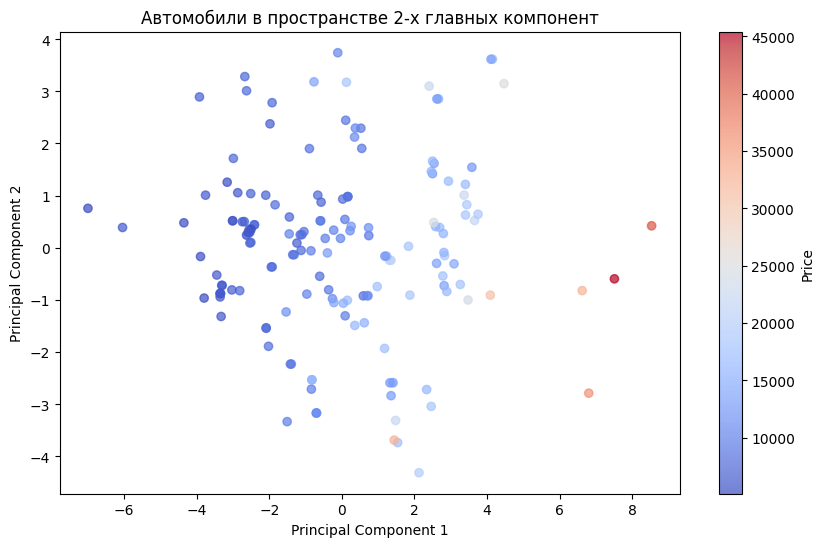

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Нормализуем данные перед применением PCA
# StandardScaler приводит признаки к нулевому среднему и единичной дисперсии
# scaler.fit_transform(X_train) возвращает X_train_scaled ∈ ℝ^(n_train×d) — нормализованные признаки
scaler = StandardScaler()

# Применяем PCA для снижения размерности до 2D
# PCA находит линейные комбинации признаков, которые максимизируют дисперсию
# X_pca_2d ∈ ℝ^(n_train×2) — проекция данных на первые 2 главные компоненты
# Каждая главная компонента — это линейная комбинация исходных признаков
pca = PCA(n_components=2)
# Сначала нормализуем, затем применяем PCA
# X_train ∈ ℝ^(n_train×d) → X_train_scaled ∈ ℝ^(n_train×d) → X_pca_2d ∈ ℝ^(n_train×2)
X_pca_2d = pca.fit_transform(scaler.fit_transform(X_train))  # X_pca_2d.shape = (n_train, 2)

# Визуализация: отображаем объекты в пространстве первых двух главных компонент
# Цвет точек соответствует цене автомобиля (y_train ∈ ℝ^n_train)
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.colorbar(sc, label='Price')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Автомобили в пространстве 2-х главных компонент')
plt.show()

**Вопросы на подумать:**

Посмотрите на график. Видите ли вы плавный переход цвета (градиент) от дешевых машин к дорогим? Если да, то что это может значить?

## 2. Борьба с мультиколлинеарностью (PCA)

Линейная регрессия плохо работает, когда признаки сильно коррелируют друг с другом (мультиколлинеарность).

Если чуть погрузиться в предметную область рассматриваемого датасета, то можно заметить, что у автомобиля в качестве признаков фигурируют длина, ширина, масса и размер колесной базы (`length`, `width`, `curb-weight`, `wheel-base`). Всё это — показатели размера. Скорее всего, они не то, чтобы дублируют друг друга, но по крайней мере говорят об одном и том же.



Для тренировочного набора данных:

*    При помощи метода `.corr()` постройте матрицу корреляций для числовых признаков.
*    Визуализируйте её с помощью `seaborn.heatmap`. Признаков много, поэтому имеет смысл отобразить на графике значения матрицы корреляций только для тех признаков, которые имеют корреляцию между собой `> 0.8` по модулю.

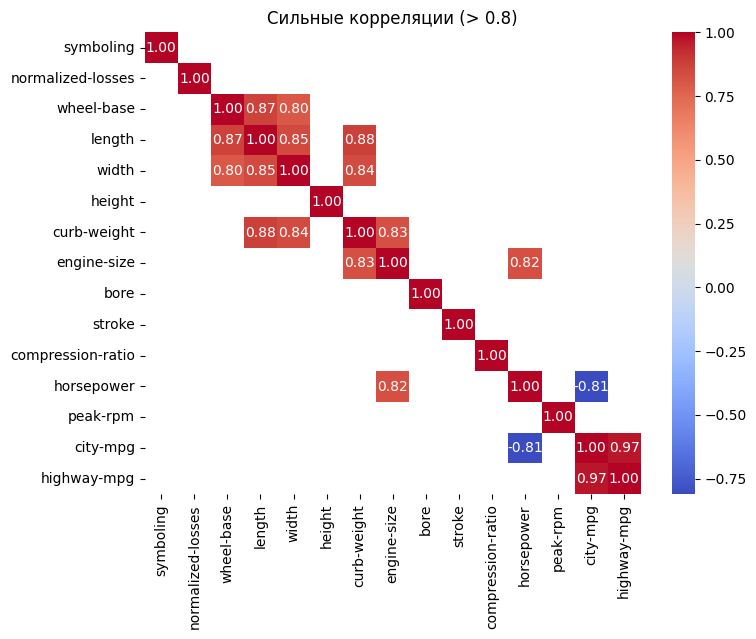

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Считаем корреляцию
corr = X_train.corr()

# Фильтруем сильные корреляции (для наглядности)
high_corr = corr[abs(corr) > 0.8]

plt.figure(figsize=(8, 6))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Сильные корреляции (> 0.8)")
plt.show()

**Вопросы на подумать:**

*    Какие выводы можем сделать?
*    Какие стратегии можно применить для борьбы с мультиколлинеарностью?

Сначала разберемся с уже упомянутыми признаками, отвечающими за размер автомобиля. Вместо того чтобы выкидывать "лишние" признаки (и терять информацию), давайте объединим их в один супер-признак "Размер". Так мы, конечно, тоже потеряем часть информации, но, возможно, с меньшим ущербом.

Для этого:

*    В тренировочном и тестовом наборах данных выделите список колонок, отвечающих за размер: `length, 'width', 'curb-weight', 'wheel-base`.
*    Для тренировочного набора данных обучите `PCA(n_components=1`) и `StandardScaler` только на этих колонках (метод `.fit()`).
*    Для тренировочного и тестового наборов данных создайте новый признак `size_pca` (результат трансформации колонок, метод `.transform()` -- сначала масштабирование, потом pca).
   
**Важно:** Удалите исходные колонки из датасетов, оставив только `size_pca`.

In [ ]:
# Выделяем признаки, связанные с размером автомобиля
# size_cols — список из 4 признаков: длина, ширина, масса, колесная база
size_cols = ['length', 'width', 'curb-weight', 'wheel-base']

# Создаем PCA для объединения признаков размера в один супер-признак
# size_pca объединит 4 признака в 1 главную компоненту
size_pca = PCA(n_components=1)

# Нормализуем признаки размера перед PCA
scaler_2 = StandardScaler()

# Применяем PCA к признакам размера на обучающей выборке
# X_train[size_cols] ∈ ℝ^(n_train×4) — исходные признаки размера
# size_component_train ∈ ℝ^(n_train×1) — новая главная компонента (супер-признак "размер")
size_component_train = size_pca.fit_transform(scaler_2.fit_transform(X_train[size_cols]))
# size_component_train.shape = (n_train, 1)

# Применяем ту же трансформацию к тестовой выборке (используем обученные scaler и pca)
# X_test[size_cols] ∈ ℝ^(n_test×4) → size_component_test ∈ ℝ^(n_test×1)
size_component_test = size_pca.transform(scaler_2.transform(X_test[size_cols]))
# size_component_test.shape = (n_test, 1)

# Создаем копии датасетов и добавляем новый признак
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()

# Добавляем новый признак 'size_pca' в датасеты
# X_train_pca теперь содержит исходные признаки + 'size_pca'
X_train_pca['size_pca'] = size_component_train
X_test_pca['size_pca'] = size_component_test

Можно заметить еще, что расход топлива (город и трасса) тоже достаточно сильно коррелирован (колонки `city-mpg` и `highway-mpg`). Наверное, это ожидаемо, они по сути друг друга дублируют.

**Важно:** удалите колонку `highway-mpg` в тренировочном и тестовом наборах данных.

Можно заметить и другие коррелированные между собой переменные, но, чтобы не усложнять, не будем на это обращать внимания. Ограничимся лишь вопросом: можете ли вы объяснить природу такой связи?

In [ ]:
# Удаляем лишние признаки
# Удаляем исходные признаки размера (они заменены на 'size_pca')
# Удаляем 'highway-mpg' (сильно коррелирует с 'city-mpg')
cols_to_drop = size_cols + ['highway-mpg']
# После удаления размерность уменьшается:
#   X_train_pca ∈ ℝ^(n_train×d_new), где d_new = d - len(cols_to_drop) + 1
#   (минус удаленные признаки, плюс добавленный 'size_pca')
X_train_pca = X_train_pca.drop(columns=cols_to_drop)
X_test_pca = X_test_pca.drop(columns=cols_to_drop)

Проверим, как наши манипуляции отразились на качестве модели:

*    Определите полученное число признаков
*    Обучите модель `LinearRegression()` на тренировочных данных
*    Вычислите `r2_score` и `MAE` для тестового набора данных


In [ ]:
# Обучаем модель на данных после PCA и удаления коррелированных признаков
# Модель находит: w_pca ∈ ℝ^d_new, b_pca ∈ ℝ
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)  # X_train_pca ∈ ℝ^(n_train×d_new), y_train ∈ ℝ^n_train

# Делаем предсказания на тестовой выборке
# pred_pca ∈ ℝ^n_test — вектор предсказаний
pred_pca = model_pca.predict(X_test_pca)  # pred_pca = X_test_pca @ w_pca + b_pca

# Выводим информацию о размерностях и метриках
print("Размерность до:", X_train.shape[1])  # Исходное количество признаков: d
print("Размерность после:", X_train_pca.shape[1])  # Новое количество признаков: d_new
print(f"R2 после PCA и чистки: {r2_score(y_test, pred_pca):.3f}")  # R² ∈ ℝ
print(f"MAE после PCA и чистки: {mean_absolute_error(y_test, pred_pca):.0f}")  # MAE ∈ ℝ

Размерность до: 15
Размерность после: 11
R2 после PCA и чистки: 0.789
MAE после PCA и чистки: 3535


Если все сделали верно, то должно получиться что-то типа
*    Размерность до: 15
*    Размерность после: 11
*    PCA R2: 0.789
*    PCA MAE: 3535

**Вопросы на подумать**:

*    Сравните метрики с базовой моделью.
*    Как произведенные манипуляции отразились на качестве модели? Почему?
*    Какие вообще могли быть сценарии и что бы на это могло влиять?

## 3. Линеаризация и Логарифмирование таргета

Линейная регрессия — модель достаточно простая. Она пытается провести прямую линию через облако точек. Если зависимость в реальном мире представляет собой кривую (гиперболу, экспоненту), линейная модель будет ошибаться.

Благоприятная ситуация для модели, когда целевая переменная линейно зависит от каждого из признаков (вспомните аналитическое выражение для множественной линейной регрессии). Поэтому если мы увидим нелинейную зависимость и "угадаем" ее, тем самым "распрямив", то потенциально это может улучшить качество модели.

Временно присоедините к тренировочному набору, полученному на прошлом шаге, столбец с откликом и при помощи `sns.pairplot` постройте графики парных зависимостей. Нас интересовать будет только то, как отклик зависит от признаков.

In [44]:
import seaborn as sns

#sns.pairplot(X_train_pca.assign(price = y_train))

### Работа с признаками

Наибольшее внимание привлекает зависимость цены от расхода топлива в городе (`city-mpg`). Причем по графику можно предположить, что зависимость обратная. Почему?

*   **MPG (Miles Per Gallon)** — это "сколько миль проедет авто на 1 галлоне".
*   **Физика:** Чем больше MPG, тем экономичнее авто.
*   **Логика:** Цене обычно соответствует *потребление* ресурсов (литры на 100 км или Галлоны на Милю).

Для того, чтобы проверить эту гипотезу:

*    Постройте `scatterplot`: зависимости отклика от `city-mpg`.
*    Создайте новый признак "Галлоны на милю" (обратная величина). Можно попробовать просто $1/x$, но иногда работает лучше $1/x^2$ или $1/x^3$. Попробуйте вариант `1 / (city-mpg**3)`.
*    Постройте график зависимости цены от этого нового признака. Стала ли зависимость больше похожа на прямую?
*    Замените признак `city-mpg` на его преобразованную версию в `X_train` и `X_test`.

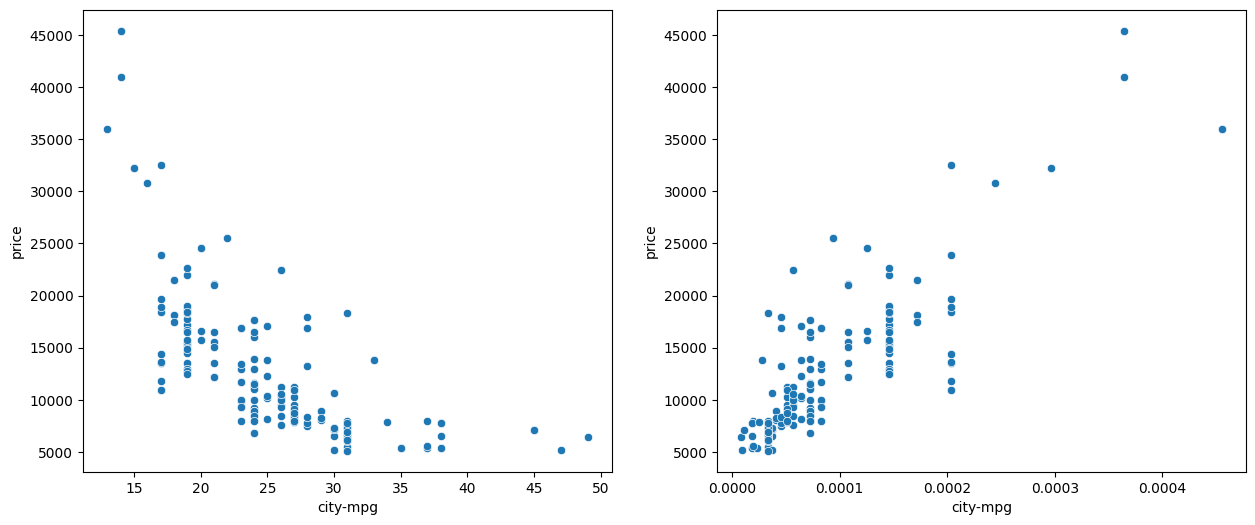

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=X_train_pca['city-mpg'], y=y_train, ax=ax[0])
modified = 1/(X_train_pca['city-mpg']) ** 3
sns.scatterplot(x=modified, y=y_train, ax=ax[1])

plt.show()

In [46]:
# Создаем новые датасеты с инженерной фичей
X_train_eng = X_train_pca.copy()
X_test_eng = X_test_pca.copy()

X_train_eng['city-mpg'] = 1/X_train_pca['city-mpg'] ** 3
X_test_eng['city-mpg'] = 1/X_test_pca['city-mpg'] ** 3

### Работа с откликом

Опираясь на то, что мы знаем о предметной области, можно предположить, как будет распределена целевая переменная: скорее всего будет достаточно много дешевых автомобилей и авто среднего сегмента, в то время, как дорогих авто будет относительно немного (проверьте, построив гистограмму отклика).

Что это значит с точки зрения обучения модели? Немногочисленные, но "весомые" объекты можно рассматривать в качестве выборосов, которые будут "перетягивать" положение линии на себя.

Логарифмирование цены (`np.log1p`) решает две проблемы:

*    "Сжимает" хвост дорогих машин, делая распределение более нормальным.
*    Модель начинает оптимизировать не абсолютную, а относительную ошибку (проценты, а не доллары).

### Простой пример

Рассмотрим два автомобиля:

- Дешёвый: 5 000

- Дорогой: 45 000

Предположим, что в исходной (долларовой) шкале модель ошибается на +3 000:

- Предсказывает 8 000 вместо 5 000 → ошибка +3 000 (60%)
- Предсказывает 48 000 вместо 45 000 → ошибка +3 000 (≈6.7%)

Теперь переведём эти значения в натуральные логарифмы и посмотрим, насколько модель ошибается в лог-шкале:

- $\log(5\,000) \approx 8.517$  
- $\log(8\,000) \approx 8.987$

Ошибка = $8.987 - 8.517 = 0.470$

- $\log(45\,000) \approx 10.714$
- $\log(48\,000) \approx 10.779$

Ошибка = $10.779 - 10.714 = 0.065$

Одна и та же абсолютная ошибка в 3 000 даёт совершенно разную ошибку в лог-шкале. Это значит, что если мы обучаем модель в лог-шкале, она не будет считать эти два случая одинаково плохими — и правильно! Потому что ошибка в 60% гораздо серьёзнее, чем в 6.7%.

**А теперь наоборот: фиксируем ошибку в лог-шкале**

Допустим, модель ошибается на +0.2 в логарифмах для обеих машин.

Тогда предсказания в долларах будут:

- Для дешёвого авто:  
  $\exp(8.517 + 0.2) = \exp(8.717) \approx 6\,100\ $  

Ошибка ≈ 1 100 (22%)

- Для дорогого авто:  
  $\exp(10.714 + 0.2) = \exp(10.914) \approx 54\,900\$

Ошибка ≈ 9 900 (22%)

Теперь относительная ошибка одинакова (~22%), хотя абсолютные ошибки сильно различаются (1 100 vs 9 900). Именно этого мы и добиваемся: модель учится быть пропорционально точной, а не "точной в долларах".

### Продолжение

1.  Создайте `y_train_log` и `y_test_log`, применив `np.log1p()` к ценам.
2.  Обучите `LinearRegression` на преобразованных данных ("распрямление" расхода и логарифмирование целевой переменной).
3.  Сделайте предсказание `pred_log` на тесте.
4.  **Важно:** Чтобы посчитать понятные метрики (в долларах), нужно вернуть предсказания назад: примените `np.expm1()` к `pred_log`.
5.  Вычислите `r2_score` и `MAE`. Сравните с предыдущими результатами.

In [ ]:
import numpy as np

# 1. Логарифмируем целевую переменную
# np.log1p(x) = ln(1+x) — более устойчивая функция для малых значений
# y_train_log ∈ ℝ^n_train — логарифм цен на обучающей выборке
# y_test_log ∈ ℝ^n_test — логарифм цен на тестовой выборке
y_train_log = np.log1p(y_train)  # y_train_log.shape = (n_train,)
y_test_log = np.log1p(y_test)  # y_test_log.shape = (n_test,)

# Обучаем модель на логарифме цены
# Модель предсказывает ln(price), а не price напрямую
# Это позволяет оптимизировать относительную ошибку, а не абсолютную
# Модель находит: w_log ∈ ℝ^d_new, b_log ∈ ℝ
model_log = LinearRegression()
model_log.fit(X_train_eng, y_train_log)  # Обучаем: ln(y) = X @ w_log + b_log

# Делаем предсказания в логарифмической шкале
# pred_log ∈ ℝ^n_test — предсказания логарифма цены
pred_log = model_log.predict(X_test_eng)  # pred_log = X_test_eng @ w_log + b_log

# Возвращаем цены обратно в доллары для расчета метрик
# np.expm1(x) = exp(x) - 1 — обратная функция к log1p
# pred_real ∈ ℝ^n_test — предсказания цены в исходной шкале
pred_real = np.expm1(pred_log)  # pred_real = exp(pred_log) - 1

# Вычисляем метрики в исходной шкале (доллары)
print(f"Log-Target R2: {r2_score(y_test, pred_real):.3f}")  # R² ∈ ℝ
print(f"Log-Target MAE: {mean_absolute_error(y_test, pred_real):.0f}")  # MAE ∈ ℝ (доллары)
# Ожидание: Прирост качества за счет правильной физики (оптимизация относительной ошибки).

Log-Target R2: 0.782
Log-Target MAE: 3176


Если все сделали верно, то должно получиться что-то типа
*    Log-Target R2: 0.782
*    Log-Target MAE: 3176

**Вопросы на подумать**:

*    Сравните метрики с предыдущей моделью.
*    Как произведенные манипуляции отразились на качестве модели? Почему?
*    Есть ли еще что-то "интересное" в графиках зависимости таргета от признаков?

## 4. Polynomial Features

Если работа с признаками дает положительные результаты, то почему бы ее не автоматизировать. Попробуем применить `Polynomial Features` для **оригинального датасета с числовыми признаками**, который мы использовали в пункте **0. Базовая модель**.

В ходе предобработки данных часто рекомендуется приводить все признаки к одному масштабу. Это важно по нескольким причинам:

*   ускорение обучения модели;
*   улучшение численной устойчивости при работе с матрицей объекты-признаки;
*   для линейных моделей: интерпретация весов при признаках как меры их значимости ([полезная ссылка](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0)).

Первый популярный способ масштабирования — нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в `sklearn`). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в `sklearn`).

1.  Используйте `Pipeline` из `sklearn.pipeline`. Это хороший тон — упаковывать препроцессинг и модель в одну коробку.
2.  Шаги пайплайна:
    *   `StandardScaler()` (для нормировки).
    *   `PolynomialFeatures(degree=2)` (создаст квадраты и произведения всех признаков).
    *   `LinearRegression()`.
3.  Обучите пайплайн на тренировочных данных
4.  Вычислите `r2_score` и `MAE` для **тренировочной** и **тестовой** выборок.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Создаем полиномиальные признаки степени 2
# Для d исходных признаков получим примерно d + d*(d+1)/2 новых признаков
# (включая степени и взаимодействия)
poly = PolynomialFeatures(degree=2)

# Нормализуем признаки перед применением полиномиальных преобразований
scaler = StandardScaler()

# Создаем пайплайн для последовательной обработки данных
# Pipeline выполняет преобразования в порядке: scaler → poly → reg
pipe_poly = Pipeline([
    ('scaler', scaler),  # Нормализация: X → X_scaled ∈ ℝ^(n×d)
    ('poly', poly),  # Полиномиальные признаки: X_scaled → X_poly ∈ ℝ^(n×d_poly), где d_poly ≈ d + d*(d+1)/2
    ('reg', LinearRegression())  # Регрессия: y = X_poly @ w + b, где w ∈ ℝ^d_poly, b ∈ ℝ
])

# Обучаем пайплайн на исходных данных
# X_train ∈ ℝ^(n_train×d) → после scaler → после poly → обучение модели
pipe_poly.fit(X_train, y_train)

# Вычисляем метрики на обучающей и тестовой выборках
# Все предсказания: pred_* ∈ ℝ^n_*
print(f"Poly Train R2: {r2_score(y_train, pipe_poly.predict(X_train)):.3f}")  # R² ∈ ℝ
print(f"Poly Train MAE: {mean_absolute_error(y_train, pipe_poly.predict(X_train)):.3f}")  # MAE ∈ ℝ
print(f"Poly Test R2: {r2_score(y_test, pipe_poly.predict(X_test)):.3f}")  # R² ∈ ℝ
print(f"Poly Test MAE: {mean_absolute_error(y_test, pipe_poly.predict(X_test)):.3f}")  # MAE ∈ ℝ

Poly Train R2: 0.997
Poly Train MAE: 217.438
Poly Test R2: -5.365
Poly Test MAE: 14506.610


Если все сделали верно, то должно получиться что-то типа

*    Poly Train R2: 0.997
*    Poly Train MAE: 217.438
*    Poly Test R2: -5.365
*    Poly Test MAE: 14506.610

**Вопросы на подумать**:
*    Что получили?

## 5. Регуляризация

### Ridge

Берем ту же полиномиальную "кашу", но применяем Ridge и Lasso. Все остальное абсолютно аналогично

Сначала **Ridge**. Протестируйте разные значения параметра силы регуляризации (`alpha`).

In [ ]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

# Ridge регрессия с L2 регуляризацией
# Функция потерь: MSE + α * ||w||², где α = 10.0
# Регуляризация штрафует за большие веса, предотвращая переобучение
pipe_ridge = Pipeline([
    ('scaler', scaler),  # Нормализация: X → X_scaled ∈ ℝ^(n×d)
    ('poly', poly),  # Полиномиальные признаки: X_scaled → X_poly ∈ ℝ^(n×d_poly)
    ('reg', Ridge(alpha=10.0))  # Ridge регрессия: w ∈ ℝ^d_poly, b ∈ ℝ
    # alpha - сила регуляризации (гиперпараметр)
])

# Обучаем пайплайн
# X_train ∈ ℝ^(n_train×d) → ... → обучение Ridge модели
pipe_ridge.fit(X_train, y_train)

# Вычисляем метрики на тестовой выборке
# pred_ridge ∈ ℝ^n_test — предсказания модели
print(f"Ridge Test R2: {r2_score(y_test, pipe_ridge.predict(X_test)):.3f}")  # R² ∈ ℝ
print(f"Ridge Test MAE: {mean_absolute_error(y_test, pipe_ridge.predict(X_test)):.3f}")  # MAE ∈ ℝ

Ridge Test R2: 0.879
Ridge Test MAE: 2422.779


При `alpha=10`, должно получиться что-то типа

*    Ridge Test R2: 0.879
*    Ridge Test MAE: 2422.779

**Вопросы на подумать**:
*    Что получили?

### Lasso

Аналогично, но учтите, что для сходимости Lasso может потребоваться больше итераций, например, можно использовать следующие параметры: `Lasso(alpha=50.0, max_iter=10000)`.

В дополнение к метрикам, определите общее число коэффициентов модели и число "зануленных" коэффициентов.

In [ ]:
# Lasso регрессия с L1 регуляризацией
# Функция потерь: MSE + α * ||w||₁, где α = 50.0
# L1 регуляризация имеет свойство отбора признаков (feature selection)
# Она зануляет веса наименее важных признаков
pipe_lasso = Pipeline([
    ('scaler', scaler),  # Нормализация: X → X_scaled ∈ ℝ^(n×d)
    ('poly', poly),  # Полиномиальные признаки: X_scaled → X_poly ∈ ℝ^(n×d_poly)
    ('reg', Lasso(alpha=50.0, max_iter=10000))  # Lasso регрессия: w ∈ ℝ^d_poly, b ∈ ℝ
    # max_iter=10000 — Lasso требует больше итераций для сходимости
])
pipe_lasso.fit(X_train, y_train)

# Вычисляем метрики на тестовой выборке
# pred_lasso ∈ ℝ^n_test — предсказания модели
print(f"Lasso Test R2: {r2_score(y_test, pipe_lasso.predict(X_test)):.3f}")  # R² ∈ ℝ
print(f"Lasso Test MAE: {mean_absolute_error(y_test, pipe_lasso.predict(X_test)):.3f}")  # MAE ∈ ℝ

# Визуализация зануления весов (Lasso)
# coefs ∈ ℝ^d_poly — вектор весов модели
coefs = pipe_lasso.named_steps['reg'].coef_
print(f"Всего признаков: {len(coefs)}")  # d_poly — общее количество полиномиальных признаков
print(f"Обнуленных признаков: {np.sum(coefs == 0)}")  # Количество признаков с нулевым весом

Lasso Test R2: 0.878
Lasso Test MAE: 2470.360
Всего признаков: 136
Обнуленных признаков: 86


При `alpha=50`, должно получиться что-то типа

*    Lasso Test R2: 0.878
*    Lasso Test MAE: 2470.360
*    Всего признаков: 136
*    Обнуленных признаков: 86

**Вопросы на подумать**:
*    Что получили?

## 6. Добавляем Категории

Часто говорят, что владельцы премиальных марок "переплачивают за бренд" и сопоставимые фактически машины от BMW и Toyota могут сильно отличаться только из-за названия. Проверим это, а заодно включим в рассмотрение и все остальные признаки.

**Итого:**
1.  Числовые признаки: Должны пройти через генерацию полиномов (`degree=2`) и масштабирование.
2.  Категориальные признаки: Должны пройти только через One-Hot Encoding. Возводить их в квадрат или перемножать между собой не нужно — это породит тысячи лишних столбцов.

**Задание:**
1.  Возьмите исходный датафрейм и разделите признаки на две группы (числовые и категориальные).
2.  Соберите Pipeline, который реализует описанную выше логику раздельной обработки.
3.  Обучите модель и выведите метрики ($R^2$, MAE).
4.  **Визуализация:** Постройте график топ-15 самых важных признаков.
    *   *Сложность:* Вам придется "вытащить" новые имена признаков из недр пайплайна, так как после `PolynomialFeatures` и `OneHotEncoder` их стало гораздо больше, и они сменили названия.

**Подсказки**:

*   Для того чтобы применять разные преобразования к разным колонкам, в `sklearn` используется `ColumnTransformer`.
*   У `ColumnTransformer` (и у финального пайплайна) есть метод `.get_feature_names_out()`, который возвращает список имен колонок после всех трансформаций. Это поможет подписать оси на графике.
*   При поиске топ-признаков не забудьте, что сортировать коэффициенты нужно по модулю (сильное отрицательное влияние так же важно, как и положительное).

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 1. Подготовка данных
# X ∈ ℝ^(n×m) — все признаки (числовые + категориальные)
# y ∈ ℝ^n — целевая переменная (цена)
X = auto.drop('price', axis=1)  # X.shape = (n, m)
y = auto['price']  # y.shape = (n,)

# Разделяем признаки на числовые и категориальные
num_features = X.select_dtypes(exclude=['object']).columns.tolist()  # Список числовых признаков
cat_features = X.select_dtypes(include=['object']).columns.tolist()  # Список категориальных признаков

# 2. Настройка трансформеров
# Для числовых признаков: Полиномиальные признаки → Нормализация
# X_num ∈ ℝ^(n×d_num) → X_poly ∈ ℝ^(n×d_poly) → X_scaled ∈ ℝ^(n×d_poly)
num_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Генерирует полиномиальные признаки степени 2
    ('scaler', StandardScaler())  # Нормализует полиномиальные признаки
])

# Для категориальных признаков: One-Hot Encoding
# X_cat ∈ ℝ^(n×d_cat) → X_ohe ∈ ℝ^(n×d_ohe), где d_ohe — количество уникальных значений
# drop='first' — удаляет первый столбец для каждой категории (избегает мультиколлинеарности)
cat_pipe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Сборка в ColumnTransformer для раздельной обработки признаков
# Применяет разные трансформации к разным типам признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_features),  # Обработка числовых признаков
        ('cat', cat_pipe, cat_features)  # Обработка категориальных признаков
    ],
    verbose_feature_names_out=True  # Чтобы имена признаков были читаемыми
)
# После preprocessor: X_processed ∈ ℝ^(n×d_final), где d_final = d_poly + d_ohe

# 3. Финальный пайплайн
# Pipeline: preprocessor → Ridge регрессия
model_complex = Pipeline([
    ('preprocessor', preprocessor),  # Обработка признаков
    ('reg', Ridge(alpha=0.5))  # Ridge регрессия: w ∈ ℝ^d_final, b ∈ ℝ
    # Функция потерь: MSE + 0.5 * ||w||²
])

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train ∈ ℝ^(n_train×m), X_test ∈ ℝ^(n_test×m)
# y_train ∈ ℝ^n_train, y_test ∈ ℝ^n_test

# Обучаем модель
model_complex.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
# y_pred ∈ ℝ^n_test — вектор предсказаний
y_pred = model_complex.predict(X_test)

# Вычисляем метрики
print(f"Final Ridge R2: {r2_score(y_test, y_pred):.3f}")  # R² ∈ ℝ
print(f"Final Ridge MAE: {mean_absolute_error(y_test, y_pred):.0f}")  # MAE ∈ ℝ

Final Ridge R2: 0.944
Final Ridge MAE: 1763


При `Ridge(alpha=0.5)`, должно получиться что-то типа

*    Final Ridge R2: 0.944
*    Final Ridge MAE: 1763

**Вопросы на подумать**:
*    Полученная важность признаков?
*    Общие выводы по работе?

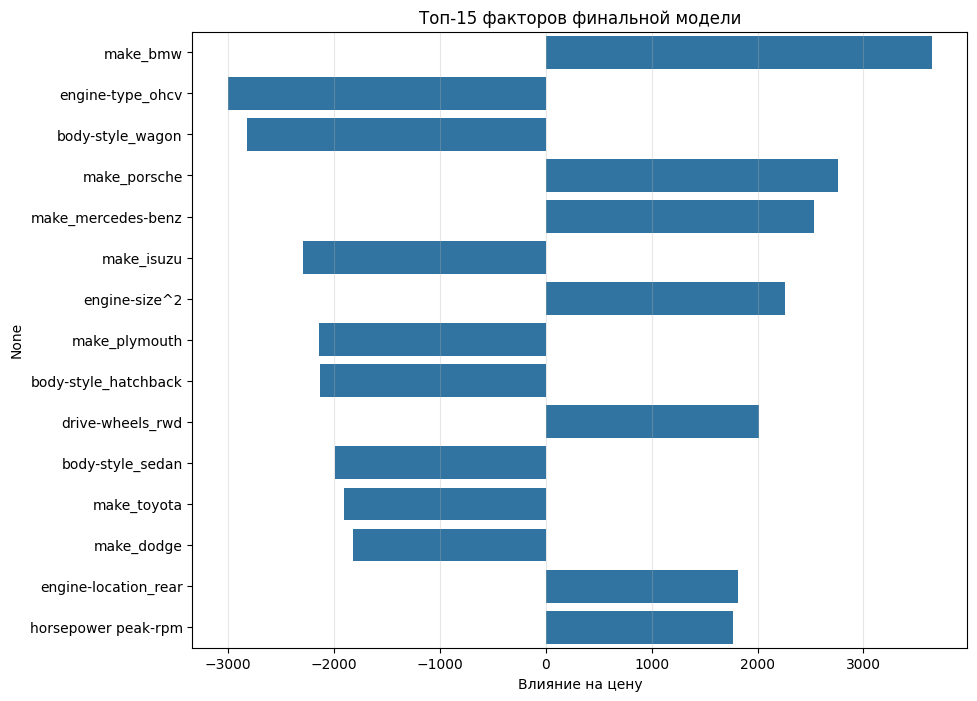

In [ ]:
# 4. Визуализация важности признаков
# Извлекаем имена признаков после всех трансформаций
# feature_names — список из d_final имен признаков
feature_names = model_complex.named_steps['preprocessor'].get_feature_names_out()

# Очищаем от технических префиксов (num__, cat__) для читаемости
clean_names = [name.replace('num__', '').replace('cat__', '') for name in feature_names]

# Извлекаем веса модели
# coefs ∈ ℝ^d_final — вектор весов для всех признаков
coefs = pd.Series(model_complex.named_steps['reg'].coef_, index=clean_names)

# Выбираем топ-15 признаков по модулю веса
# Сортируем по абсолютному значению (важны и положительные, и отрицательные влияния)
top_coefs = coefs.sort_values(key=abs, ascending=False).head(15)
# top_coefs — Series с 15 наиболее важными признаками

# Визуализируем важность признаков
plt.figure(figsize=(10, 8))
sns.barplot(x=top_coefs.values, y=top_coefs.index)
plt.title("Топ-15 факторов финальной модели")
plt.xlabel("Влияние на цену")  # Вес признака (коэффициент регрессии)
plt.grid(axis='x', alpha=0.3)
plt.show()